# Music Recommendation using Model Development Content Based Filtering

## Business Understanding

Building machine learning models for music recommendation

## Dataset Understanding

Pada proyek ini dataset yang digunakan adalah [Dataset Top Hits Spotify from 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019). Dataset tersebut terdiri dari 2000 *data records* dengan 18 *features*. Berikut adalah detail dari dataset yang digunakan pada proyek ini :

| Attribute | Description | Data Type |
|---|---|---|
| artist | Name of the artist who performs the song | Text |
| song | Title of the song | Text |
| duration_ms | Duration of the song in milliseconds | Integer |
| explicit | Indicates whether the song contains explicit lyrics or content | Boolean |
| year | Year the song was released | Integer |
| popularity | Popularity of the song | Integer |
| danceability | How suitable a song is for dancing based on a combination of musical elements | Decimal (0.0 - 1.0) |
| energy | Intensity and activity of the song | Decimal (0.0 - 1.0) |
| key | Key of the song | Integer (referring to the musical scale) |
| loudness | Loudness of the song in decibels (dB) | Decimal |
| mode | Indicates the scale of the song, major (value 1) or minor (value 0) | Integer |
| speechiness | Probability of the presence of spoken words in a song | Decimal (0.0 - 1.0) |
| acousticness | Confidence whether the track is acoustic | Decimal (0.0 - 1.0) |
| instrumentalness | Probability that a song contains no vocals | Decimal (0.0 - 1.0) |
| liveness | Probability that the song was recorded live | Decimal (0.0 - 1.0) |
| valence | Positivity conveyed by a track | Decimal (0.0 - 1.0) |
| tempo | Overall estimated tempo of a track in beats per minute (BPM) | Integer |
| genre | Genre of the song | Text |

**Notes:**

* The data type "Decimal" indicates a numeric value that ranges between 0.0 and 1.0.
* The data type "Integer" indicates a numeric value without a decimal point.


## Import Necessary Libraries

In [52]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Gathering Data

**Dataset Source :** https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019


In [53]:
# Connect Google Colaboratory with Kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json


In [54]:
! kaggle datasets download paradisejoy/top-hits-spotify-from-20002019

top-hits-spotify-from-20002019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
! unzip top-hits-spotify-from-20002019.zip -d /content/data/

Archive:  top-hits-spotify-from-20002019.zip
replace /content/data/songs_normalize.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Data Assessing

In [56]:
df = pd.read_csv('/content/data/songs_normalize.csv')
print('Jumlah data musik : ', len(df.song.unique()))

Jumlah data musik :  1879


In [57]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Exploratory Data Analysis


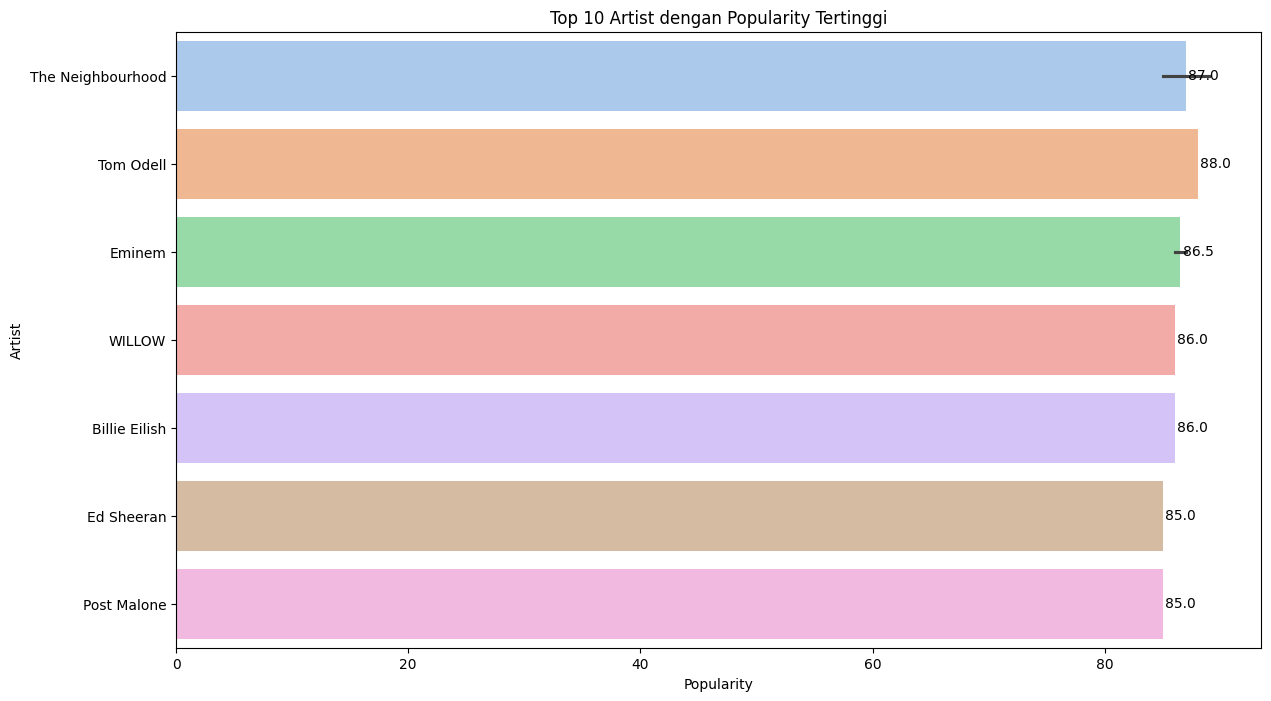

In [58]:
top_artists = df.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(14, 8))
plot = sns.barplot(x='popularity', y='artist', data=top_artists, palette='pastel')
plt.title('Top 10 Artist dengan Popularity Tertinggi')
plt.xlabel('Popularity')
plt.ylabel('Artist')
for i in plot.patches:
    plot.text(i.get_width() + 0.2, i.get_y() + i.get_height()/2, str(round(i.get_width(), 2)), fontsize=10, color='black', ha='left', va='center')
plt.show()

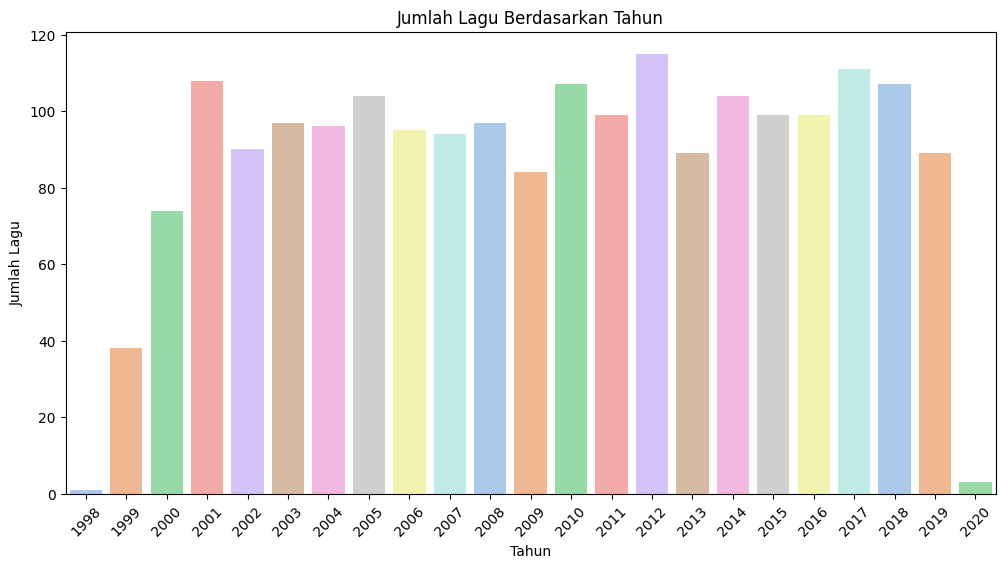

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='pastel')
plt.title('Jumlah Lagu Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()

### Univariate Exploratory Data Analysis


Seperti yang dapat dilihat pada hasil *gathering data* bahwa dataset yang digunakan pada proyek ini memiliki 18 *features*, yaitu :
- artist
- song
- duration_ms
- explicit
- year
- popularity
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- genre

Tahap eksplorasi penting untuk memahami variabel ataupun features pada data serta korelasi antar variabel. Pemahaman terhadap variabel pada data dan korelasinya akan membantu dalam menentukan pendekatan atau algoritma yang cocok untuk dataset yang digunakan.


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Berdasarkan *output* di atas dapat diketahui bahwa pada dataset yang digunakan terdapat 2000 entri. Pada dataset ini, terdapat beberapa variabel yang akan digunakan dalam membuat model machine learning, di antaranya yaitu artist, song, year, popularity, danceability, energy, *speechiness*, *acousticness*, *instrumentalness*, valence, *tempo*, genre. Oleh karena itu, *features* lain yang tidak digunakan pada proyek ini akan dibuang / *dropping*.

In [61]:
# Menghapus beberapa fitur dari DataFrame
features_to_drop = ['duration_ms', 'explicit', 'key', 'loudness', 'mode']
df_clean = df.drop(columns=features_to_drop)

# Memeriksa DataFrame setelah fitur dihapus
df = df_clean
df.head()

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Untuk melihat ada berapa banyak entri yang unik untuk setiap *features* maka dapat dilakukan dengan cara sebagai berikut

In [62]:
print('Banyak data artist \t\t: ', len(df.artist.unique()))
print('Banyak data song \t\t: ', len(df.song.unique()))
print('Banyak data year \t\t: ', len(df.year.unique()))
print('Banyak data popularity \t\t: ', len(df.popularity.unique()))
print('Banyak data danceablity \t: ', len(df.danceability.unique()))
print('Banyak data energy \t\t: ', len(df.energy.unique()))
print('Banyak data speechiness \t: ', len(df.speechiness.unique()))
print('Banyak data acousticness \t: ', len(df.acousticness.unique()))
print('Banyak data instrumentalness \t: ', len(df.instrumentalness.unique()))
print('Banyak data valence \t\t: ', len(df.valence.unique()))
print('Banyak data tempo \t\t: ', len(df.tempo.unique()))
print('Banyak data genre \t\t: ', len(df.genre.unique()))

Banyak data artist 		:  835
Banyak data song 		:  1879
Banyak data year 		:  23
Banyak data popularity 		:  76
Banyak data danceablity 	:  565
Banyak data energy 		:  580
Banyak data speechiness 	:  837
Banyak data acousticness 	:  1208
Banyak data instrumentalness 	:  772
Banyak data valence 		:  760
Banyak data tempo 		:  1831
Banyak data genre 		:  59


## Data Preparation

In [63]:
# memerika apakah terdapat missing value
df.isnull().sum()

artist              0
song                0
year                0
popularity          0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Berdasarkan *output* di atas, pada dataset yang digunakan ini tidak terdapat *missing value*.

In [64]:
# memeriksa apakah terdapat data yang duplicated
df.duplicated().sum()

59

In [65]:
# Menghilangkan data yang duplikat
df_clean = df.drop_duplicates()

# Memeriksa apakah data yang duplikat telah dihapus
print("Jumlah data sebelum dihapus duplikat:", len(df))
print("Jumlah data setelah dihapus duplikat:", len(df_clean))

df = df_clean

Jumlah data sebelum dihapus duplikat: 2000
Jumlah data setelah dihapus duplikat: 1941


In [66]:
# Menampilkan nilai unik dari kolom 'year'
unique_year = df['year'].unique()
unique_year.sort()
unique_year

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

Apabila diperhatikan, lagu atau musik pada dataset yang digunakan pada proyek ini adalah lagu atau musik dari tahun 1998 hingga tahun 2000.

In [67]:
# Menampilkan nilai unik dari kolom 'popularity' dengan mengurutkannya
unique_popularity = df['popularity'].unique()
unique_popularity.sort()
unique_popularity

array([ 0,  1,  2,  3,  4,  6,  7,  8, 11, 16, 17, 18, 21, 24, 26, 27, 28,
       30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89])

Apabila diperhatikan, tingkat popularity lagu atau musik pada dataset ini beragam, yang paling rendah yaitu 0, sedangkan yang paling tinggi dalam kategori popularity yaitu 89.

In [68]:
# Menampilkan nilai unik dari kolom 'genre'
unique_genre = df['genre'].unique()
print(unique_genre)

['pop' 'rock, pop' 'pop, country' 'rock, metal' 'hip hop, pop, R&B'
 'hip hop' 'pop, rock' 'pop, R&B' 'Dance/Electronic'
 'pop, Dance/Electronic' 'rock, Folk/Acoustic, easy listening' 'metal'
 'hip hop, pop' 'R&B' 'pop, latin' 'Folk/Acoustic, rock'
 'pop, easy listening, Dance/Electronic' 'rock' 'rock, blues, latin'
 'pop, rock, metal' 'rock, pop, metal' 'hip hop, R&B' 'pop, Folk/Acoustic'
 'set()' 'hip hop, pop, latin' 'hip hop, Dance/Electronic'
 'hip hop, pop, rock' 'World/Traditional, Folk/Acoustic'
 'Folk/Acoustic, pop' 'rock, easy listening' 'World/Traditional, hip hop'
 'hip hop, pop, R&B, latin' 'rock, blues' 'rock, R&B, Folk/Acoustic, pop'
 'latin' 'pop, R&B, Dance/Electronic' 'World/Traditional, rock'
 'pop, rock, Dance/Electronic' 'pop, easy listening, jazz'
 'rock, Dance/Electronic' 'World/Traditional, pop, Folk/Acoustic'
 'country' 'hip hop, pop, Dance/Electronic' 'hip hop, pop, country'
 'World/Traditional, rock, pop' 'World/Traditional, pop'
 'hip hop, pop, R&B, Dance/El

Apabila diperhatikan, terdapat beberapa genre lagu yang datanya memiliki lebih dari satu genre, dan genre tersebut muncul lebih dari satu kali. Hal ini tentunya akan berpengaruh pada performa model, sehinggda diperlukan penanganan untuk mengatasi hal ini. Misalnya "rock, pop", "rock, metal".

 Pada proyek ini, data yang akan diambil hanya kategori pertama untuk data yang memiliki genre lebih dari satu.



In [69]:
# Memperbaiki kode untuk menangani kasus genre dengan tanda '/'
df['genre'] = df[~(df.genre.isna())]['genre'].apply(lambda x: x.split(',')[0] if x.split(',')[0] != "Hip Hop" else "Hip Hop" if '/' not in x else x)

In [70]:
print(df['genre'].value_counts())

genre
pop                  912
hip hop              749
rock                 155
Dance/Electronic      41
set()                 22
latin                 15
R&B                   13
World/Traditional     10
country               10
metal                  9
Folk/Acoustic          4
easy listening         1
Name: count, dtype: int64


Apabila diperhatikan, terdapat genre musik yang tidak wajar pada dataset, yaitu set(). Perlu dilakukan analisis lebih lanjut pada data tersebut.

In [71]:
# Menampilkan data dengan genre "set"
set_songs = df[df['genre'] == 'set()']
set_songs

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,Wheatus,Teenage Dirtbag,1999,71,0.625,0.850,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,2002,66,0.607,0.923,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
291,Blazin' Squad,Crossroads - Radio Edit,2012,40,0.661,0.746,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
428,George Michael,Amazing,2004,57,0.805,0.754,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
455,DJ Casper,Cha Cha Slide - Hardino Mix,2004,51,0.853,0.911,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
481,Eamon,Fuck It (I Don't Want You Back),2004,64,0.828,0.653,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
545,Brian McFadden,Almost Here,2004,42,0.561,0.452,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
645,Meck,Thunder in My Heart Again (Radio Edit),2005,46,0.679,0.922,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
710,Ida Corr,Let Me Think About It,2012,43,0.762,0.754,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,2006,17,0.847,0.861,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


Setelah dilakukan analisis di atas, sebenarynya sayang jika data dengan genre set() tersebut langsung di-drop begitu saja. Namun,karena tidak bisa mengidentifikasi musik tersebut termasuk ke dalam genre musik mana. Oleh karena itu, untuk saat ini data tersebut akan dibuat / *dropping*.



In [72]:
# Menghapus data dengan genre "set"
df = df[df['genre'] != 'set()']

In [73]:
# Menampilkan data dengan genre "set"
set_songs = df[df['genre'] == 'set()']
set_songs

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


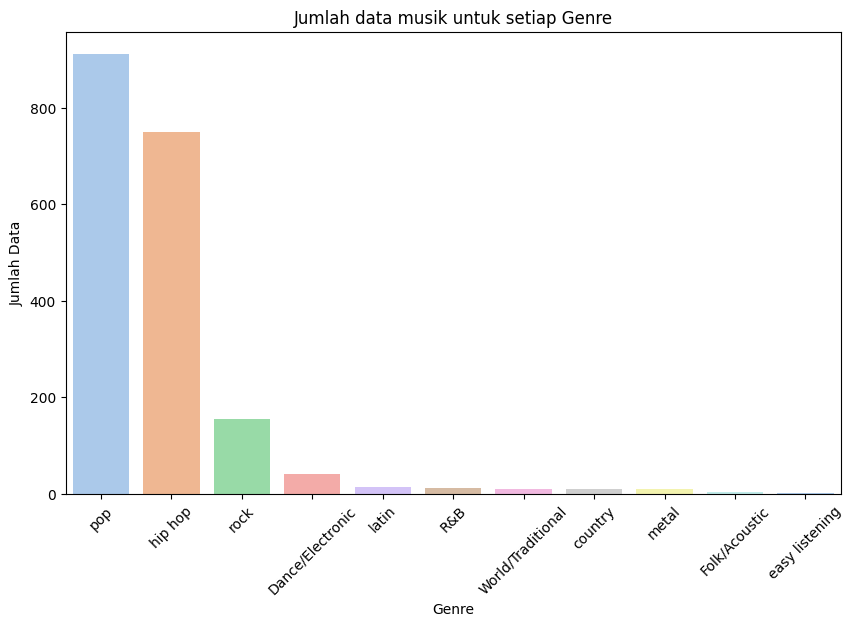

In [74]:
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel')
plt.title('Jumlah data musik untuk setiap Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

## Model Development Content Based Filtering

Pada proyek ini, akan dilakukan tahapan membangun sistem rekomendasi musik berdasarkan jenis genre musik.

In [75]:
data = df

In [76]:
data.head()

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['acoustic', 'country', 'dance', 'easy', 'electronic', 'folk',
       'hip', 'hop', 'latin', 'listening', 'metal', 'pop', 'rock',
       'traditional', 'world'], dtype=object)

In [78]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1919, 15)

In [79]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.song
).sample(10, axis=1).sample(10, axis=0)


,acoustic,world,latin,listening,hop,pop,dance,electronic,metal,country
song,,,,,,,,,,
Take A Bow,0.0,0.0,0.0,0.0,0.707107,0.0,0.000000,0.000000,0.0,0.0
Lights - Single Version,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0
Rock This Party - Everybody Dance Now,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0
human,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0
TiK ToK,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0
Naughty Girl,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0
Starz In Their Eyes,0.0,0.0,0.0,0.0,0.000000,0.0,0.707107,0.707107,0.0,0.0
Do You Want To,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Before He Cheats,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0


Berdasarkan *output* di atas, diperoleh hasil misalnya lagu dengan judul *Wish You Well* merupakan genre Pop, begitu pula dengan lagu *Not In Love - Radio Mix*, *Drunk in Love (feat Jay-Z)*, dan seterusnya.

Sampai tahapan ini, telah berhasil dilakukan identifikasi representasi fitur dengan fungsi tfidvectorizer. Selain itu, hasil dari matriks sebelumnya menunjukkan korelasi antara genre dengan judul lagu. Selanjutnya, akan dilakukan perhitungan derajat kesamaan antara satu lagu dengan lagu lainnya untuk menghasilkan kandidat lagu yang akan direkomendasikan.



## Cosine Similarity

Tahapan ini akan menggunakan fungsi [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

Pada tahapan ini, dilakukan perhitungan cosine similarity dataframe tfidf_matrix yang telah diperoleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, maka telah berhasil dilakukan perhitungan kesamaan (similarity) antar lagu. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya yaitu melihat matriks kesamaan setiap lagu dengan menampilkan judul lagu dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).



In [87]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul lagu
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['song'], columns=data['song'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap lagu
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1919, 1919)


song,Luv U Better,Don't Mind,Jubel - Radio Edit,Spotlight,Another Love
song,,,,,
My Band,1.0,1.0,0.0,0.0,0.0
Criminal,0.0,0.0,1.0,1.0,1.0
Chasing Pavements,0.0,0.0,1.0,1.0,1.0
One Last Breath - Radio Version,0.0,0.0,1.0,1.0,1.0
My Type,1.0,1.0,0.0,0.0,0.0
"I'm Not a Girl, Not Yet a Woman",0.0,0.0,1.0,1.0,1.0
More Than You Know,0.0,0.0,1.0,1.0,1.0
Up (feat. Demi Lovato),0.0,0.0,1.0,1.0,1.0
Like A G6,1.0,1.0,0.0,0.0,0.0


Berdasrkan *cosine similarity* di atas, dapat diidentifikasi kesamaan antara satu lagu dengan lagu lainnya. Shape (1919, 1919) merupakan ukuran matrik *similarity* dari data yang digunakan.Berdasarkan data yang ada, matrik di atas sebenarnya berukuran 1919 lagu x 1919 lagu (masing-masing dalam sumbu X dan Y). Artinya, telah dilakukan identifikasi tingkat kesamaan pada 1919 lagu. Tapi tentu hasilnya tidak dapat ditampilkan semuanya. Oleh karena itu, hanya 10 judul lagu pada vertikal dan 5 lagu pada sumbu horizontal yang ditampilkan seperti pada output di atas.

Apabila diperhatikan, dapat diidentifikasi bahwa lagu pada kolom X (horizontal) memiliki kesamaan dengan lagu pada baris Y (vertikal). Sebagai contoh lagu *My Band* teridentifikasi sama(similar) dengan lagu *Don't Mind*.

### top-N recommendation

Setelah memiliki data similarity (kesamaan) antar lagu. Selanjutnya yaitu menghasilkan sejumlah lagu yang akan direkomendasikan kepada pengguna.

In [83]:
def lagu_recommendations(nama_lagu, similarity_data=cosine_sim_df, items=data[['song', 'genre']], k=5):
    """
    Rekomendasi lagu berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_lagu : tipe data string (str)
                Nama lagu (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan lagu sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_lagu].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_lagu agar nama lagu yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_lagu, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


Pada code di atas menggunakan *argpartition*, yang mana mengambail sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe **cosine_sim_df**). Kemudian, diambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data tersebut dimasukkan ke dalam variabel *closest*. Selanjutnya, menghapus lagu yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, akan dicari lagu yang mirip dengan lagu dari Taylor Swift dengan judul **Love Story**.

In [84]:
# Menampilkan daftar lagu dengan artis Taylor Swift
taylor_swift_songs = df[df['artist'] == 'Taylor Swift'].head()
taylor_swift_songs

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
905,Taylor Swift,Love Story,2008,74,0.617,0.741,0.0311,0.13100,0.000000,0.0772,0.306,118.984,pop
993,Taylor Swift,You Belong With Me,2008,55,0.687,0.771,0.0384,0.16400,0.000025,0.1120,0.445,129.964,pop
1093,Taylor Swift,Back To December,2010,65,0.529,0.670,0.0303,0.11700,0.000000,0.3340,0.286,141.893,pop
1258,Taylor Swift,I Knew You Were Trouble.,2012,59,0.622,0.469,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1343,Taylor Swift,I Knew You Were Trouble.,2012,76,0.622,0.469,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop


In [85]:
data[data.song.eq('Love Story')]

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
905,Taylor Swift,Love Story,2008,74,0.617,0.741,0.0311,0.131,0.0,0.0772,0.306,118.984,pop


Apabila diperhatikan, lagu Taylor Swift yang berjudul **Love Story** termasuk dalam genre **Pop**.

In [86]:
# Mendapatkan rekomendasi lagu yang mirip dengan lagu Taylor Swift - Love Story
lagu_recommendations('Love Story')

,song,genre
0,TiK ToK,pop
1,All The Right Moves,pop
2,Paparazzi,pop
3,Release Me,pop
4,If U Seek Amy,pop


Pada *output* di atas berhasil didapatkan 5 rekomendasi lagu yang memiliki kemiripan dengan lagu Taylor Swift - Love Story yang bergenre **POP**.

--- End of code ---